# 1. seaborn 
### 1.1 seaborn
- 기존 matplotlib에 기본 설정을 추가
- 복잡한 그래프를 간단하게 생성 가능한 wrapper
- 간단한 코드 + 이쁘게

### 1.2 seaborn - basic plots
- 손쉽게 데이터 산출
- lineplot, scatterplot, countplot 등

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "darkgrid")

In [2]:
tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

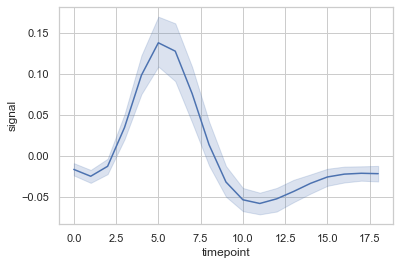

In [4]:
sns.set_style("whitegrid")
sns.lineplot(x = "timepoint", y = "signal", data = fmri) # pandas형 data
# 정렬안되어 있는 data를 정렬해서 그려줌 평균값 연결해서 그림
# 형광펜 처럼 되어있는 건 분포를 뜻함

In [10]:
fmri["event"].unique()

array(['stim', 'cue'], dtype=object)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

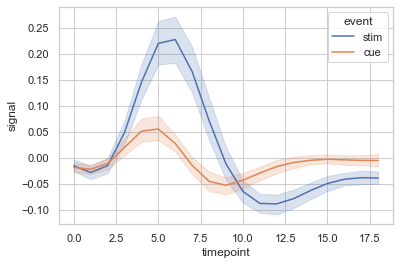

In [9]:
sns.lineplot(x="timepoint", y = "signal", hue="event", data= fmri) 
# hue : category에 따라 data가 어떻게 변하는지 알 수 있음

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

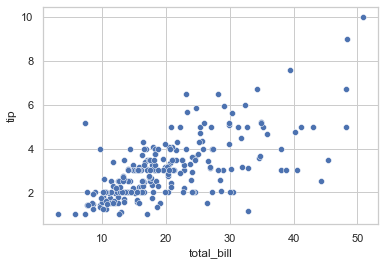

In [12]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

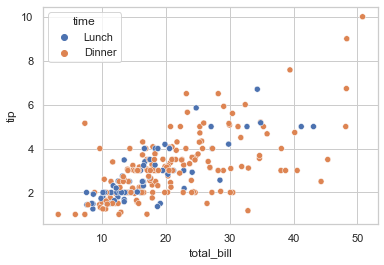

In [14]:
sns.scatterplot(x="total_bill", y="tip", hue = "time", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

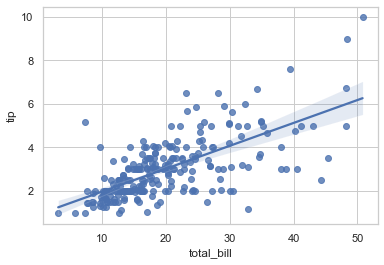

In [13]:
sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='smoker', ylabel='count'>

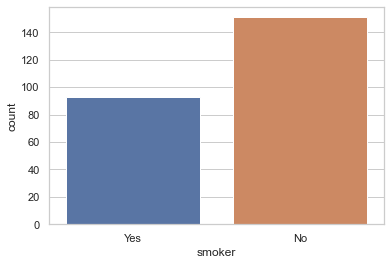

In [15]:
sns.countplot(x="smoker", data=tips)

<AxesSubplot:xlabel='smoker', ylabel='count'>

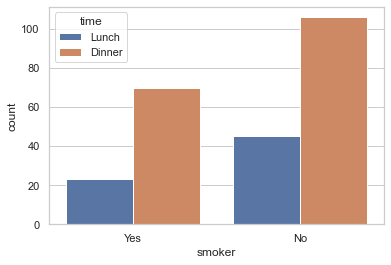

In [16]:
sns.countplot(x="smoker", hue="time", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

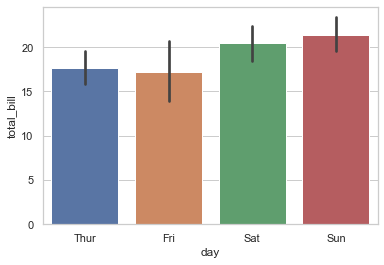

In [18]:
sns.barplot(x="day",y="total_bill",data=tips)

In [19]:
tips.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='day', ylabel='total_bill'>

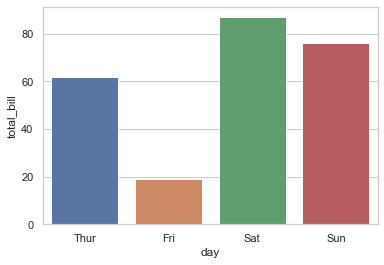

In [20]:
sns.barplot(x="day",y="total_bill",data=tips, estimator=len)
# estimator : 원하는 결과 볼 수 있음 ex) len : 데이터 개수

<AxesSubplot:xlabel='total_bill'>

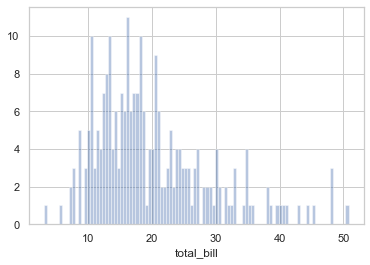

In [22]:
sns.distplot(tips["total_bill"], bins = 100, kde = False)

### 1.3 Seaborn - predefined plots
- viloinplot : boxplot에 distribution을 함께 표현
- Stripplot : scatter와 category 정보 함께 표현
- Swarmplot : 분포와 함께 scatter 함께 표현
- Pointplot : category별로 numeri의 평균, 신뢰구간 표시
- regplot : scatter + 선형함수 함께 표시

<AxesSubplot:xlabel='day', ylabel='total_bill'>

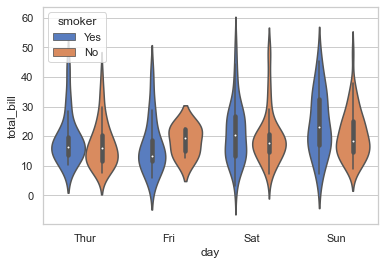

In [23]:
# kde 같이 볼 수 있음
sns.violinplot(x="day",y="total_bill",hue = "smoker", data=tips, palette="muted")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

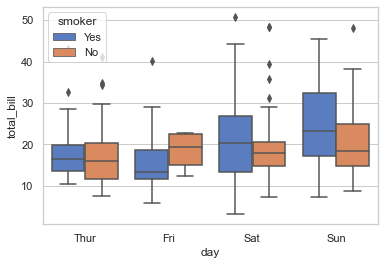

In [24]:
sns.boxplot(x="day",y="total_bill",hue = "smoker", data=tips, palette="muted")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

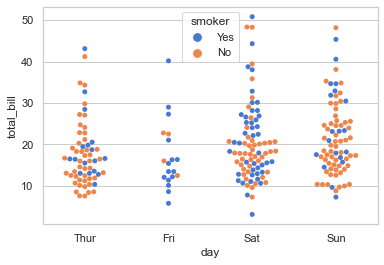

In [25]:
sns.swarmplot(x="day",y="total_bill",hue = "smoker", data=tips, palette="muted")

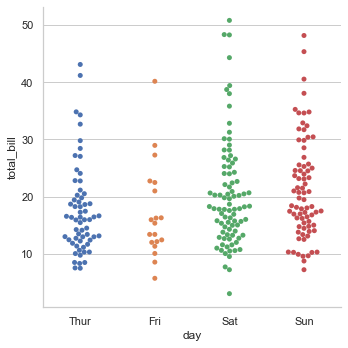

In [26]:
sns.catplot(x="day",y="total_bill", kind = "swarm", data=tips)

In [27]:
tips["time"]

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

> Category형 데이터를 결합할 때는 FacetGrid 사용

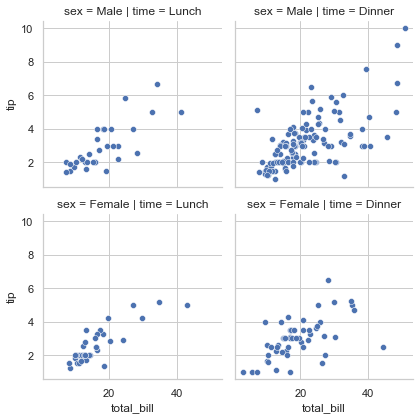

In [28]:
g = sns.FacetGrid(tips, col = "time", row ="sex")
g.map(sns.scatterplot, "total_bill", "tip")

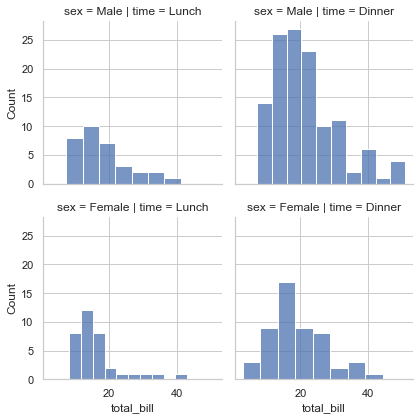

In [31]:
g = sns.FacetGrid(tips, col = "time", row ="sex")
g.map_dataframe(sns.histplot, "total_bill")